In [1]:
filename = "crawldata/hr21.tld_hr.good.lang_English.part01.prevert"

from bs4 import BeautifulSoup 

# Reading the data inside the xml file to a variable under the name  data
with open(filename, 'r') as f:
    # Note the prefix and suffix:
    # Without it only the first document is read.
    filecontent = "<data>" + f.read() + "</data>"

# Passing the stored data inside the beautifulsoup parser 
data = BeautifulSoup(filecontent, 'xml', )


In [2]:
docs = data.find_all("doc")
len(docs)

713634

In [3]:
parsed_docs = list()

for doc in docs:
    doc_id = doc["id"]
    paragraphs = doc.find_all("p")
    paragraphs = [p.contents[0].replace("\n", " ") for p in paragraphs]
    paragraphs = "   ".join(paragraphs)
    parsed_docs.append({
        "id": doc_id,
        "text": paragraphs
    })


In [9]:
import pandas as pd
df = pd.DataFrame(data=parsed_docs)

In [10]:
from utils import get_lexicon, preprocess, count_variants
import logging
logging.basicConfig(format='%(asctime)s %(message)s', level=logging.WARNING)


lex = get_lexicon(min_length=3, only_verified=True)

df["variant_detector_count"] = df.text.apply(lambda s: count_variants(s, lex)[0])
df["variant_detector_breakdown"] = df.text.apply(lambda s: count_variants(s, lex)[1])
df["words"] = df.text.apply(lambda t: len(t.split()))
df["A_B"] = df.variant_detector_count.apply(lambda d:d.get("A", 0) - d.get("B", 0))
df["A_B_normalized"] = df.A_B / df.words


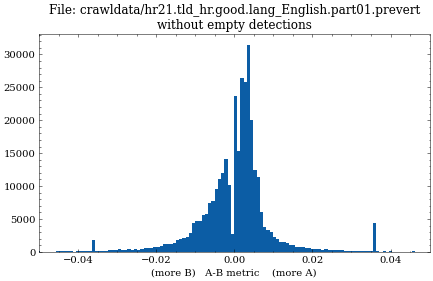

In [11]:
import matplotlib.pyplot as plt
plt.style.use("science no-latex".split())
plt.figure(figsize=(7,4))
plt.hist(df.A_B_normalized[df.variant_detector_count != {}], bins=400)
plt.xlim((-0.05, 0.05))
plt.title(f"File: {filename}\nwithout empty detections")

plt.xlabel("(more B)   A-B metric    (more A)")
plt.savefig("images/A_B_normalized_hr_part01.png")
plt.show()

In [12]:
sum(df.A_B == 0)/df.shape[0]

0.5598766314385245

In [13]:
sum(df.variant_detector_count == {})/df.shape[0]

0.5302185714245677

In [15]:
pd.set_option('max_colwidth', 100)
df.loc[df.variant_detector_count!={}, ["variant_detector_breakdown", "text"]].sample(1000).to_json("hr21.tld_hr.good.lang_English.part01.prevert.variant_detector_output.json",
orient="records", indent=4)


In [93]:
df.variant_detector_breakdown[261917]

{'unfavourable': {'variant': 'B', 'count': 1},
 'favourable': {'variant': 'B', 'count': 2},
 'center': {'variant': 'A', 'count': 6},
 'analyze': {'variant': 'A', 'count': 1}}

In [77]:

df.variant_detector_breakdown[207656]

{'misdemeanours': {'variant': 'B', 'count': 1},
 'characterises': {'variant': 'B', 'count': 1},
 'fulfilment': {'variant': 'B', 'count': 1},
 'neighbourhood': {'variant': 'B', 'count': 1},
 'centre': {'variant': 'B', 'count': 1}}

In [96]:
df.variant_detector_breakdown[230059]

{'colours': {'variant': 'B', 'count': 4},
 'paneling': {'variant': 'A', 'count': 6},
 'colour': {'variant': 'B', 'count': 2},
 'grey': {'variant': 'B', 'count': 2},
 'aluminum': {'variant': 'A', 'count': 1},
 'center': {'variant': 'A', 'count': 1}}

In [89]:
df.text[68695]

' {"car":{},"items":{"initialized":true,"colours":[],"wheels":[],"upholsteries":[],"packs":[],"extras":[],"equipmentUpholsteries":[],"wheelExtras":[],"promotions":[],"disclaimerPromotions":[],"filterCarOptions":[],"winterWheels":[],"servicePlans":[],"tyres":[]},"basket":{"initialized":false,"colour":{},"primaryAccentColour":null,"secondaryAccentColour":null,"upholstery":{},"wheel":{},"extras":[],"packs":[],"servicePlans":[],"packExtras":[],"total":{"cash":0,"monthly":0,"exclVat":0,"discount":0,"promotions":[],"highlight":false,"licenseFee":0,"onlineCashDiscount":0,"onlineMonthlyDiscount":0,"onlineCashPromotions":[],"onlineMonthlyPromotions":[],"isWLTP":false,"discountTax":0,"discountWithoutTax":0},"userSelected":[],"userSelectedPromotions":[]},"utils":{"domTarget":"tor-ckrc0tica0d110rs01k698fbq","financeOption":"cash","activePersonalization":"colour","showOverlayLoader":false,"showOverlayDisclaimer":true,"showMobileBasket":false,"trackQueue":[],"analyticsLoaded":false,"waitingForAnalyt